# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sms
sms.set()

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [11]:
pathfile = 'Categorical.csv'
data = pd.read_csv(pathfile)
print(data)

             name   Longitude   Latitude      continent
0           Aruba  -69.982677  12.520880  North America
1     Afghanistan   66.004734  33.835231           Asia
2          Angola   17.537368 -12.293361         Africa
3        Anguilla  -63.064989  18.223959  North America
4         Albania   20.049834  41.142450         Europe
..            ...         ...        ...            ...
236         Samoa -172.164851 -13.753243        Oceania
237         Yemen   47.586762  15.909280           Asia
238  South Africa   25.083901 -29.000341         Africa
239        Zambia   27.774759 -13.458242         Africa
240      Zimbabwe   29.851441 -19.004204         Africa

[241 rows x 4 columns]


## Map the data

Use the <i>'continent'</i> category for this analysis.

In [12]:
dict_continent_class = {'North America':0,'Europe':1,'Asia':2,'Africa':3,'South America':4, 'Oceania':5,'Seven seas (open ocean)':6, 'Antarctica':7}
dict_continent_class

{'North America': 0,
 'Europe': 1,
 'Asia': 2,
 'Africa': 3,
 'South America': 4,
 'Oceania': 5,
 'Seven seas (open ocean)': 6,
 'Antarctica': 7}

In [13]:
data_classified = data.copy()
data_classified['continent'] = data_classified['continent'].map(dict_continent_class)
data_classified

,name,Longitude,Latitude,continent
0,Aruba,-69.982677,12.520880,0
1,Afghanistan,66.004734,33.835231,2
2,Angola,17.537368,-12.293361,3
3,Anguilla,-63.064989,18.223959,0
4,Albania,20.049834,41.142450,1
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5
237,Yemen,47.586762,15.909280,2
238,South Africa,25.083901,-29.000341,3
239,Zambia,27.774759,-13.458242,3


## Select the features

In [14]:
x = data_classified[['continent']]

## Clustering

Use 4 clusters initially.

In [15]:
kmean = KMeans(4)
kmean.fit(x)

KMeans(n_clusters=4)

## Clustering results

In [16]:
id_clusters = kmean.predict(x)
id_clusters

array([1, 2, 0, 1, 1, 1, 1, 2, 0, 2, 3, 3, 3, 3, 1, 3, 1, 2, 0, 1, 0, 0,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 2, 0, 0,
       0, 0, 3, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 3, 0, 1, 1, 3, 0, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       3, 0, 2, 3, 1, 1, 1, 1, 2, 1, 2, 2, 3, 1, 2, 2, 1, 2, 1, 1, 1, 2,
       2, 2, 2, 0, 2, 2, 3, 1, 2, 1, 2, 2, 2, 0, 0, 1, 1, 2, 0, 1, 1, 1,
       2, 1, 0, 1, 1, 0, 3, 1, 3, 1, 0, 1, 2, 1, 2, 3, 0, 0, 1, 3, 0, 2,
       0, 3, 0, 3, 0, 1, 3, 1, 1, 2, 3, 3, 2, 2, 1, 3, 0, 2, 3, 3, 1, 1,
       2, 1, 0, 2, 3, 2, 1, 1, 0, 0, 2, 0, 0, 0, 2, 3, 3, 3, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 3, 2, 1, 0, 0, 2, 2, 2, 2, 3, 1, 0,
       2, 2, 0, 0, 1, 0, 1, 2, 1, 1, 0, 1, 1, 2, 3, 3, 3, 2, 0, 0, 0])

In [17]:
data_with_clusters = data_classified.copy()
data_with_clusters['Cluster'] = id_clusters
data_with_clusters

,name,Longitude,Latitude,continent,Cluster
0,Aruba,-69.982677,12.520880,0,1
1,Afghanistan,66.004734,33.835231,2,2
2,Angola,17.537368,-12.293361,3,0
3,Anguilla,-63.064989,18.223959,0,1
4,Albania,20.049834,41.142450,1,1
...,...,...,...,...,...
236,Samoa,-172.164851,-13.753243,5,3
237,Yemen,47.586762,15.909280,2,2
238,South Africa,25.083901,-29.000341,3,0
239,Zambia,27.774759,-13.458242,3,0


## Plot the data

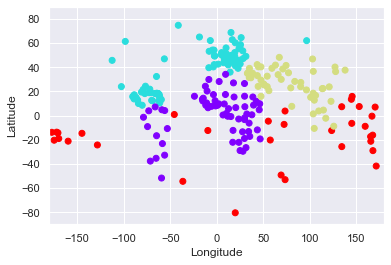

In [18]:
x_plot = data_with_clusters['Longitude']
y_plot = data_with_clusters['Latitude']
cluster_plot = data_with_clusters['Cluster']
#cluster_plot = data_with_clusters['continent']
plt.scatter(x_plot, y_plot, c= cluster_plot,cmap='rainbow')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.ylim([-90,90])
plt.xlim([-180,180])
plt.show()

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.